 Variance Inflation Factor (VIF):
       feature           VIF
0       const  16901.024982
1      MedInc      2.539815
2    HouseAge      1.237337
3    AveRooms      7.917240
4   AveBedrms      6.609200
5  Population      1.134824
6    AveOccup      1.009733
7    Latitude      9.206134
8   Longitude      8.875984

 R² (결정계수): 0.5758
 MSE (평균제곱오차): 0.5559


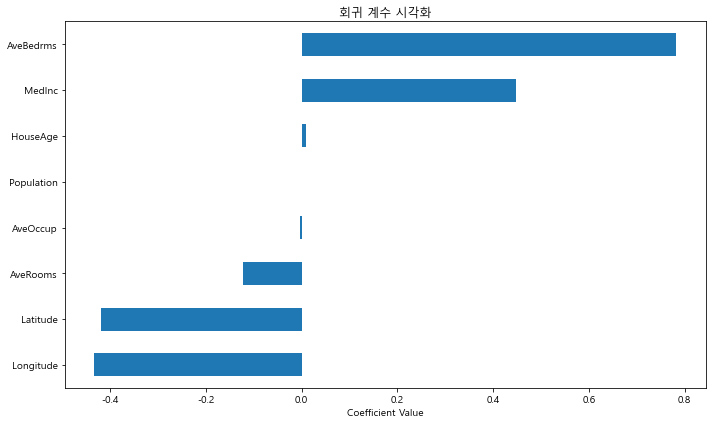

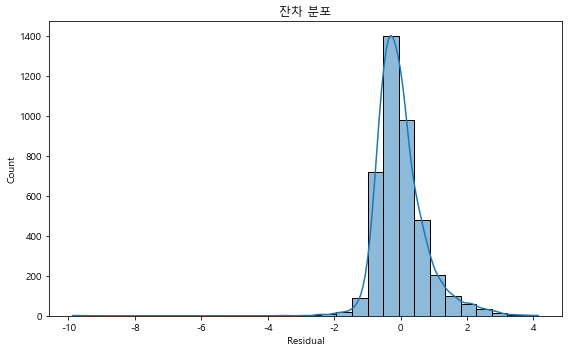

In [2]:
# 1. 라이브러리 임포트
import matplotlib
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2. 데이터 로딩
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="target")

# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. VIF (다중공선성) 계산
X_vif = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(" Variance Inflation Factor (VIF):\n", vif_data)

# 5. 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 6. 예측 및 성능 평가
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\n R² (결정계수): {r2:.4f}")
print(f" MSE (평균제곱오차): {mse:.4f}")

# 7. 회귀 계수 시각화
coefficients = pd.Series(model.coef_, index=X.columns)
plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh')
plt.title("회귀 계수 시각화")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

# 8. 잔차 분석
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("잔차 분포")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()
